# Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Loading the Datasets

In [3]:
red_wine=pd.read_csv("winequality-red.csv",delimiter=";")
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
white_wine=pd.read_csv("winequality-white.csv",delimiter=";")
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Exploratory Data Analysis

In [4]:
red_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
white_wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

Red wine quality ranges from 3 to 8(low to high quality)
White wine quality ranges from 3 to 9

In [6]:
red_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
white_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values in both datasets

In [8]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


No categorical columns in both datasets

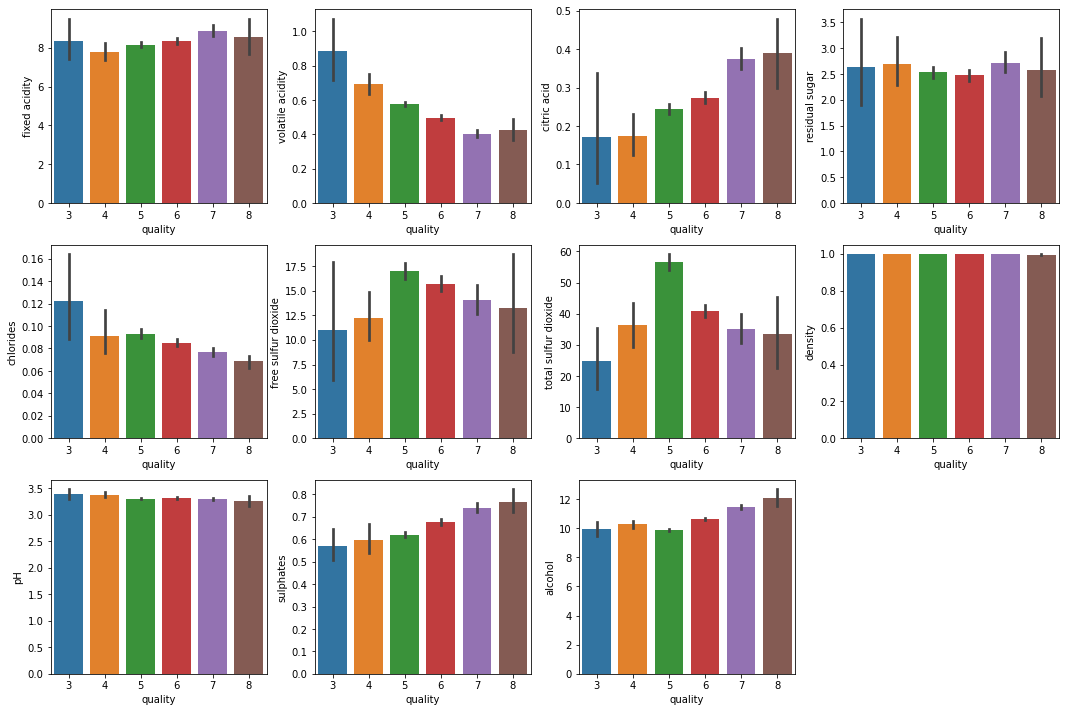

In [10]:
#Quality vs Features for red wine

fig = plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=red_wine)
plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=red_wine)
plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=red_wine)
plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=red_wine)
plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=red_wine)
plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=red_wine)
plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=red_wine)
plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=red_wine)
plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=red_wine)
plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=red_wine)
plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=red_wine)
plt.tight_layout()

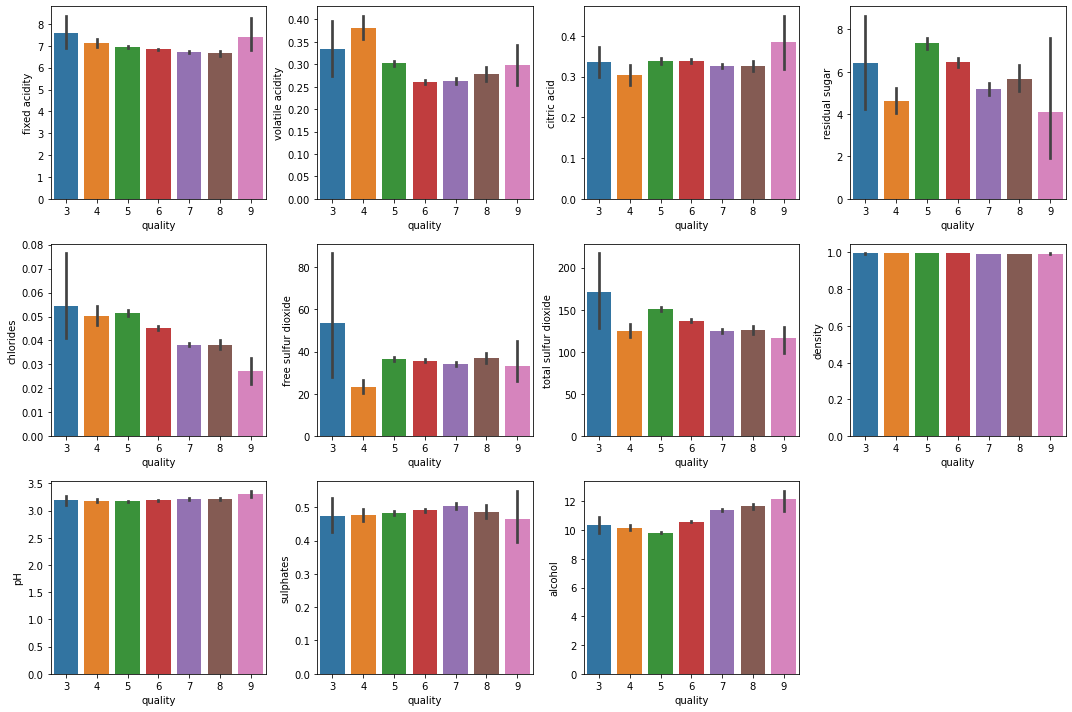

In [10]:
#Quality vs Features for whhite wine

fig = plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=white_wine)
plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=white_wine)
plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=white_wine)
plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=white_wine)
plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=white_wine)
plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=white_wine)
plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=white_wine)
plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=white_wine)
plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=white_wine)
plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=white_wine)
plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=white_wine)
plt.tight_layout()

In [8]:
temp_red=red_wine[red_wine['quality']>5.5]['volatile acidity']
temp1_red=red_wine[red_wine['quality']<=5.5]['volatile acidity']
print("Quality Vs Volatile Acidity-->","High Quality",temp_red.mean(),"Low Quality",temp1_red.mean())

Quality Vs Volatile Acidity--> High Quality 0.47414619883041 Low Quality 0.5895026881720431


In [9]:
temp_white=white_wine[white_wine['quality']>6]['volatile acidity']
temp1_white=white_wine[white_wine['quality']<=6]['volatile acidity']
print("Quality Vs Volatile Acidity-->","High Quality",temp_white.max(),"Low Quality",temp1_white.max())

Quality Vs Volatile Acidity--> High Quality 0.76 Low Quality 1.1


In [13]:
temp_red=red_wine[red_wine['quality']>5.5]['chlorides']
temp1_red=red_wine[red_wine['quality']<=5.5]['chlorides']
print("Quality Vs Chlorides-->","High Quality",temp_red.mean(),"Low Quality",temp1_red.mean())

Quality Vs Chlorides--> High Quality 0.08266081871345021 Low Quality 0.09298924731182794


In [14]:
temp_white=white_wine[white_wine['quality']>6]['chlorides']
temp1_white=white_wine[white_wine['quality']<=6]['chlorides']
print("Quality Vs chlorides-->","High Quality",temp_white.mean(),"Low Quality",temp1_white.mean())

Quality Vs chlorides--> High Quality 0.038160377358490497 Low Quality 0.04787467430953647


In [15]:
temp_red=red_wine[red_wine['quality']>5.5]['sulphates']
temp1_red=red_wine[red_wine['quality']<=5.5]['sulphates']
print("Quality Vs Sulphates-->","High Quality",temp_red.mean(),"Low Quality",temp1_red.mean())

Quality Vs Sulphates--> High Quality 0.6926198830409347 Low Quality 0.618534946236559


In [16]:
temp_white=white_wine[white_wine['quality']>6]['sulphates']
temp1_white=white_wine[white_wine['quality']<=6]['sulphates']
print("Quality Vs sulphates-->","High Quality",temp_white.mean(),"Low Quality",temp1_white.mean())

Quality Vs sulphates--> High Quality 0.5001415094339613 Low Quality 0.4870036477331957


In [18]:
temp_red=red_wine[red_wine['quality']>5.5]['alcohol']
temp1_red=red_wine[red_wine['quality']<=5.5]['alcohol']
print("Quality Vs alcohol-->","High Quality",temp_red.mean(),"Low Quality",temp1_red.mean())

Quality Vs alcohol--> High Quality 10.855029239766068 Low Quality 9.926478494623645


In [ ]:
temp_white=white_wine[white_wine['quality']>6]['alcohol']
temp1_white=white_wine[white_wine['quality']<=6]['alcohol']
print("Quality Vs alcohol-->","High Quality",temp_white.mean(),"Low Quality",temp1_white.mean())

In [22]:
temp_red=red_wine[red_wine['quality']>5.5]['residual sugar']
temp1_red=red_wine[red_wine['quality']<=5.5]['residual sugar']
print("Quality Vs Residual sugar-->","High Quality",temp_red.mean(),"Low Quality",temp1_red.mean())

Quality Vs Residual sugar--> High Quality 2.535964912280701 Low Quality 2.542069892473117


In [21]:
temp_white=white_wine[white_wine['quality']>6]['residual sugar']
temp1_white=white_wine[white_wine['quality']<=6]['residual sugar']
print("Quality Vs Residual sugar-->","High Quality",temp_white.mean(),"Low Quality",temp1_white.mean())

Quality Vs Residual sugar--> High Quality 5.2615094339622575 Low Quality 6.703478374153222


In [25]:
temp_red=red_wine[red_wine['quality']>5.5]['total sulfur dioxide']
temp1_red=red_wine[red_wine['quality']<=5.5]['total sulfur dioxide']
print("Quality Vs total sulfur dioxide-->","High Quality",temp_red.mean(),"Low Quality",temp1_red.mean())

Quality Vs total sulfur dioxide--> High Quality 39.35204678362573 Low Quality 54.645161290322584


In [24]:
temp_white=white_wine[white_wine['quality']>6]['total sulfur dioxide']
temp1_white=white_wine[white_wine['quality']<=6]['total sulfur dioxide']
print("Quality Vs total sulphur dioxide-->","High Quality",temp_white.mean(),"Low Quality",temp1_white.mean())

Quality Vs total sulphur dioxide--> High Quality 125.24528301886792 Low Quality 141.98293381969776


In [5]:
temp_red=red_wine[red_wine['quality']>5.5]['free sulfur dioxide']
temp1_red=red_wine[red_wine['quality']<=5.5]['free sulfur dioxide']
print("Quality Vs free sulfur dioxide-->","High Quality",temp_red.mean(),"Low Quality",temp1_red.mean())

Quality Vs free sulfur dioxide--> High Quality 15.27251461988304 Low Quality 16.567204301075268


In [6]:
temp_white=white_wine[white_wine['quality']>6]['free sulfur dioxide']
temp1_white=white_wine[white_wine['quality']<=6]['free sulfur dioxide']
print("Quality Vs free sulphur dioxide-->","High Quality",temp_white.mean(),"Low Quality",temp1_white.mean())

Quality Vs free sulphur dioxide--> High Quality 34.550471698113206 Low Quality 35.51732673267327


From the plots above we can infer:
Quality is high when volatile acidity is less.
Quality is high when chlorides are less.
Quality is high when sulphates are more.
Quality is high when alcohol is more.
Residual Sugar more in white wine than in Red wine

In [11]:
red_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
white_wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

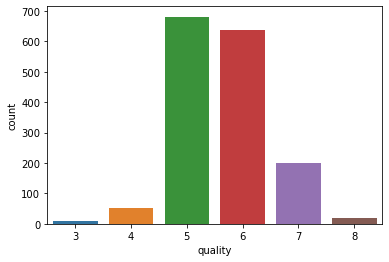

In [12]:
sns.countplot(x='quality',data=red_wine)

<AxesSubplot:xlabel='quality', ylabel='count'>

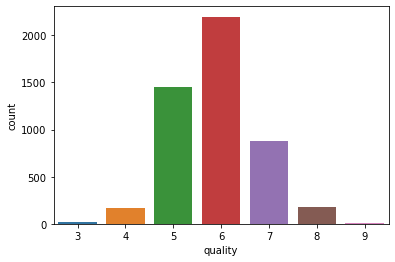

In [8]:
sns.countplot(x='quality',data=white_wine)

In [13]:
#apply SMOTE to balance the dataset

To check for correlated features

<AxesSubplot:>

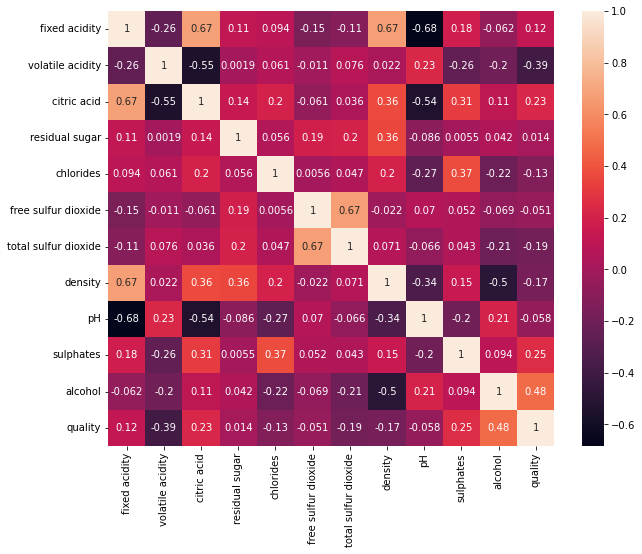

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(red_wine.corr(),annot=True)#correlation matrix

In [16]:
#red_wine.corr().iloc[1,3]
#red_wine.corr().columns
abs(red_wine.corr().iloc[1,5])


0.01050382700659221

In [5]:
for i in range(0,len(red_wine.columns)):
    for j in range(0,len(red_wine.columns)):
        if abs(red_wine.corr().iloc[i,j]) >=0.5 and i!=j:
            print(red_wine.columns[i],",",red_wine.columns[j])
        

fixed acidity , citric acid
fixed acidity , density
fixed acidity , pH
volatile acidity , citric acid
citric acid , fixed acidity
citric acid , volatile acidity
citric acid , pH
free sulfur dioxide , total sulfur dioxide
total sulfur dioxide , free sulfur dioxide
density , fixed acidity
pH , fixed acidity
pH , citric acid


In [6]:
name=[]
for a in range(len(red_wine.corr().columns)):
    for b in range(a):
        if abs(red_wine.corr().iloc[a,b]) >=0.5:
            name.append((a,b))
            #name = red_wine.corr().columns[a]
print(name)


[(2, 0), (2, 1), (6, 5), (7, 0), (8, 0), (8, 2)]


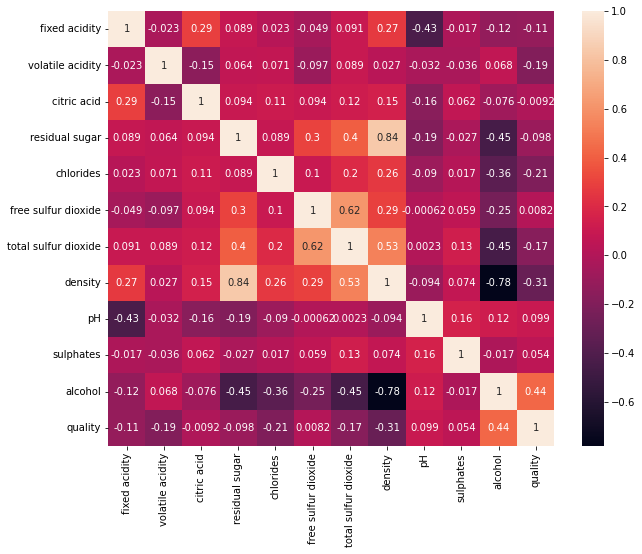

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(white_wine.corr(),annot=True)
plt.show()

In [7]:
for i in range(0,len(white_wine.columns)):
    for j in range(0,len(white_wine.columns)):
        if abs(white_wine.corr().iloc[i,j]) >=0.5 and i!=j:
            print(white_wine.columns[i],",",white_wine.columns[j])
        

residual sugar , density
free sulfur dioxide , total sulfur dioxide
total sulfur dioxide , free sulfur dioxide
total sulfur dioxide , density
density , residual sugar
density , total sulfur dioxide
density , alcohol
alcohol , density


Correlated features can be avoided.

In [8]:
red_wine['rating']=red_wine['quality'].apply(lambda x: 'Good' if x>=6 else 'Cheap')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Cheap
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Cheap
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Cheap
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Cheap


In [10]:
white_wine['rating']=white_wine['quality'].apply(lambda x: 'Good' if x>=6 else 'Cheap')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Good
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Good


1    855
0    744
Name: target, dtype: int64


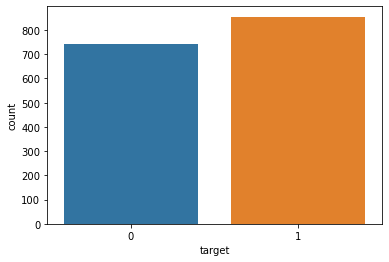

In [60]:
sns.countplot(x=red_wine['target'],data=red_wine)
print(red_wine['target'].value_counts())

1    3258
0    1640
Name: target, dtype: int64


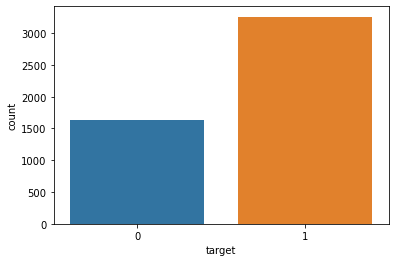

In [59]:
sns.countplot(x=white_wine['target'],data=white_wine)
print(white_wine['target'].value_counts())

Count of white wine shows that there is a need to balance the dataset

Step 10 – Balancing the two classes.
good_quality = wine[wine['quality']==1]
bad_quality = wine[wine['quality']==0]
bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:217]
new_df = pd.concat([good_quality,bad_quality])
new_df = new_df.sample(frac=1)
new_df
In this step, we are simply balancing our dataset.
We are making a new data frame good_quality in which we will have data of just good_quality wine or we can say where the quality is 1.
Similarly, we are making for bad_quality.
Then we are simply shuffling bad quality data using df.sample(frac=1). It means shuffle the data and take a 100% fraction of the data.
Then we are taking out 217 samples of bad_quality because we have just 217 samples of good_quality.
Then we are joining both 217 samples of each class and our final data frame will have 217*2=434 rows.
Finally, again shuffling the data.

In [12]:
enc=LabelEncoder()
red_wine['target']=enc.fit_transform(red_wine['rating'])
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Cheap,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Cheap,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Cheap,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Good,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Cheap,0


In [13]:
#enc=LabelEncoder()
white_wine['target']=enc.fit_transform(white_wine['rating'])
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Good,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Good,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Good,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Good,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Good,1


In [15]:
good_quality = white_wine[white_wine['target']==1]
bad_quality = white_wine[white_wine['target']==0]
good_quality = good_quality.sample(frac=1)
good_quality = good_quality[:1640]
new_white = pd.concat([good_quality,bad_quality])
new_white = new_white.sample(frac=1)
new_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating,target
3444,6.7,0.300,0.44,18.75,0.057,65.0,224.0,0.99956,3.11,0.53,9.1,5,Cheap,0
3768,6.3,0.240,0.29,13.70,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,6,Good,1
1732,6.6,0.545,0.04,2.50,0.031,48.0,111.0,0.99060,3.14,0.32,11.9,5,Cheap,0
3772,6.3,0.240,0.29,13.70,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,6,Good,1
1814,8.2,0.420,0.29,4.10,0.030,31.0,100.0,0.99110,3.00,0.32,12.8,7,Good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,6.2,0.300,0.17,2.80,0.040,24.0,125.0,0.99390,3.01,0.46,9.0,5,Cheap,0
2400,9.2,0.190,0.42,2.00,0.047,16.0,104.0,0.99517,3.09,0.66,10.0,4,Cheap,0
3461,6.7,0.240,0.30,3.85,0.042,105.0,179.0,0.99189,3.04,0.59,11.3,8,Good,1
1265,6.9,0.310,0.34,7.40,0.059,36.0,174.0,0.99630,3.46,0.62,11.1,7,Good,1


In [16]:
new_white['target'].value_counts()

0    1640
1    1640
Name: target, dtype: int64

In [20]:
red_wine.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
target                  0.848279
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [61]:
Xr = red_wine.drop(['quality','target','rating'],axis=1) 
yr = red_wine['target']
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.3, random_state=100)

In [20]:
Xw = white_wine.drop(['quality','target','rating'],axis=1) 
yw = white_wine['target']
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.3, random_state=100)

In [21]:
Xwn = new_white.drop(['quality','target','rating'],axis=1) 
ywn = new_white['target']
Xwn_train, Xwn_test, ywn_train, ywn_test = train_test_split(Xwn, ywn, test_size=0.3, random_state=100)

In [56]:
len(yr_test)

480

In [58]:
Xr_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
361,8.6,0.450,0.31,2.6,0.086,21.0,50.0,0.99820,3.37,0.91,9.9
121,8.8,0.550,0.04,2.2,0.119,14.0,56.0,0.99620,3.21,0.60,10.9
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.99430,3.58,0.52,9.9
420,9.5,0.560,0.33,2.4,0.089,35.0,67.0,0.99720,3.28,0.73,11.8
870,7.7,0.715,0.01,2.1,0.064,31.0,43.0,0.99371,3.41,0.57,11.8


In [23]:
# creating normalization object 
norm = MinMaxScaler()
new_xrtrain = norm.fit_transform(Xr_train)
new_xrtest = norm.transform(Xr_test)
# display values
print(new_xrtrain)


[[0.35779817 0.2260274  0.31       ... 0.49606299 0.34730539 0.26785714]
 [0.37614679 0.29452055 0.04       ... 0.37007874 0.16167665 0.44642857]
 [0.08256881 0.3390411  0.         ... 0.66141732 0.11377246 0.26785714]
 ...
 [0.33027523 0.5        0.14       ... 0.48818898 0.1257485  0.30357143]
 [0.14678899 0.32876712 0.1        ... 0.63779528 0.10778443 0.66071429]
 [0.2293578  0.34246575 0.06       ... 0.60629921 0.11976048 0.23214286]]


In [24]:
# creating normalization object 
norm = MinMaxScaler()
new_xwtrain = norm.fit_transform(Xwn_train)
new_xwtest = norm.transform(Xwn_test)
# display values
print(new_xwtrain)

[[0.43055556 0.29411765 0.4        ... 0.40196078 0.10588235 0.77586207]
 [0.13888889 0.09803922 0.29       ... 0.29411765 0.25882353 0.29310345]
 [0.15277778 0.25       0.34       ... 0.49019608 0.50588235 0.27586207]
 ...
 [0.13888889 0.26470588 0.37       ... 0.58823529 0.12941176 0.51724138]
 [0.27777778 0.05882353 0.44       ... 0.53921569 0.32941176 0.31034483]
 [0.22222222 0.25490196 0.3        ... 0.40196078 0.30588235 0.05172414]]


In [136]:
yr.value_counts()

1    855
0    744
Name: target, dtype: int64

In [58]:
modelstypes={
    "LR":LogisticRegression(solver='liblinear'),
    "RFC":RandomForestClassifier(n_estimators=100),
    "KNN":KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree'),
    "NBC":GaussianNB(),
    "XGBoost":XGBClassifier(n_estimators = 250, learning_rate = 0.25,use_label_encoder=False)
}


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
#model=DecisionTreeClassifier()
#scores=cross_val_score(model,X,y,cv=skfold)
#print(np.mean(scores))

In [28]:
def fit_and_score(modelstypes,X_train,y_train,X_test,y_test):
    model_scores={}
    y_predict={}
    trained_model={}
    for name,model in modelstypes.items():
        #score=cross_val_score(model,Xr,yr,cv=skfold)
        #Fit the model to the data
        trained_model[name]=model.fit(X_train,y_train)
        #y_predict[name]=model.predict(X_test)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores,trained_model

In [31]:
model_scores,train_model=fit_and_score(modelstypes=modelstypes,
                                                  X_train=Xr_train,
                                                   y_train=yr_train,
                                                      X_test=Xr_test,
                                                      y_test=yr_test)
model_scores

{'LR': 0.74375,
 'RFC': 0.8041666666666667,
 'KNN': 0.6416666666666667,
 'NBC': 0.7395833333333334}

In [109]:
score_red={}
for name,model in modelstypes.items():
    score_red[name]=cross_val_score(model,Xr,yr,cv=skfold)
    
score_red

{'LR': array([0.671875  , 0.7375    , 0.759375  , 0.75      , 0.74294671]),
 'RFC': array([0.6625    , 0.70625   , 0.759375  , 0.74375   , 0.70846395]),
 'KNN': array([0.625    , 0.603125 , 0.628125 , 0.578125 , 0.5799373]),
 'NBC': array([0.69375   , 0.684375  , 0.759375  , 0.721875  , 0.72727273])}

In [32]:
model_scores,train_model=fit_and_score(modelstypes=modelstypes,
                                                  X_train=new_xwtrain,
                                                   y_train=ywn_train,
                                                      X_test=new_xwtest,
                                                      y_test=ywn_test)
model_scores

{'LR': 0.7286585365853658,
 'RFC': 0.8038617886178862,
 'KNN': 0.7215447154471545,
 'NBC': 0.7042682926829268}

In [33]:
score_white={}
for name,model in modelstypes.items():
    score_white[name]=cross_val_score(model,Xwn,ywn,cv=skfold)
    
score_white

{'LR': array([0.70121951, 0.72408537, 0.71646341, 0.74542683, 0.69207317]),
 'RFC': array([0.81402439, 0.80640244, 0.81859756, 0.82469512, 0.7804878 ]),
 'KNN': array([0.67073171, 0.66920732, 0.67682927, 0.69207317, 0.6402439 ]),
 'NBC': array([0.67073171, 0.7027439 , 0.70731707, 0.74847561, 0.68292683])}

In [86]:
#from sklearn.pipeline import Pipeline
# define the pipeline
#stp = [('fitmodel', fit_and_score(modelstypes,Xr,yr))]
#prediction = Pipeline(steps=stp)

In [91]:
param = {'n_estimators':[50,100,500]}
grid_rf = GridSearchCV(RandomForestClassifier(),param,scoring='accuracy',cv=10,)
grid_rf.fit(Xr_train, yr_train)
print('Best parameters --> ', grid_rf.best_params_)
# Wine Quality Prediction
pred = grid_rf.predict(Xr_test)
print(confusion_matrix(yr_test,pred))
print('\n')
print(classification_report(yr_test,pred))
print('\n')
print(accuracy_score(yr_test,pred))

Best parameters -->  {'n_estimators': 100}
[[177  55]
 [ 37 211]]


              precision    recall  f1-score   support

           0       0.83      0.76      0.79       232
           1       0.79      0.85      0.82       248

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480



0.8083333333333333


In [93]:
x_predict = list(grid_rf.predict(Xr_test))
predicted_df = {'predicted_values': x_predict, 'original_values': yr_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
678,0,0
1500,0,0
1457,0,0
1079,1,1
909,1,1
1114,1,1
1322,1,0
346,1,1
1129,1,1
1019,1,0


In [52]:
xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.25,use_label_encoder=False)
xgb.fit(Xr_train, yr_train, eval_set = [(Xr_test, yr_test)], early_stopping_rounds = None,verbose = False)
score_xgb = xgb.score(Xr_test,yr_test)

[13:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [53]:
score_xgb

0.8041666666666667

In [137]:
from sklearn.metrics import classification_report
cr_red=classification_report(xgb.predict(Xr),yr)
print(cr_red)

              precision    recall  f1-score   support

           0       0.96      0.49      0.65      1458
           1       0.13      0.79      0.22       141

    accuracy                           0.52      1599
   macro avg       0.54      0.64      0.44      1599
weighted avg       0.89      0.52      0.61      1599



In [56]:
from sklearn.metrics import classification_report
cr_white=classification_report(xgb.predict(new_xwtest),ywn_test)
print(cr_white)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       494
           1       0.79      0.80      0.79       490

    accuracy                           0.79       984
   macro avg       0.79      0.79      0.79       984
weighted avg       0.79      0.79      0.79       984



In [64]:
white_wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Good,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Good,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Good,1


In [ ]:
residual sugar , density
free sulfur dioxide , total sulfur dioxide
total sulfur dioxide , free sulfur dioxide
total sulfur dioxide , density
density , residual sugar
density , total sulfur dioxide
density , alcohol
alcohol , density

In [126]:
Xwn = new_white.drop(['density','free sulfur dioxide','quality','target','rating'],axis=1) 
ywn = new_white['target']

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10)
model=XGBClassifier(n_estimators = 100, eval_metric='error',learning_rate = 0.25,use_label_encoder=False)
scores=cross_val_score(model,Xwn,ywn,cv=kfold)
print(np.mean(scores))
scores

0.7835365853658536


array([0.7804878 , 0.77743902, 0.78658537, 0.78963415, 0.79878049,
       0.79268293, 0.80487805, 0.79573171, 0.75609756, 0.75304878])

In [ ]:
fixed acidity , citric acid
fixed acidity , density
fixed acidity , pH
volatile acidity , citric acid
citric acid , fixed acidity
citric acid , volatile acidity
citric acid , pH
free sulfur dioxide , total sulfur dioxide
total sulfur dioxide , free sulfur dioxide
density , fixed acidity
pH , fixed acidity
pH , citric acid

In [122]:
Xrf = red_wine.drop(['citric acid','pH','free sulfur dioxide','quality','target','rating'],axis=1) 
yrf = red_wine['target']

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
skfold=StratifiedKFold(n_splits=10)
model=XGBClassifier(n_estimators = 100, eval_metric='error',learning_rate = 0.25,use_label_encoder=False)
scores=cross_val_score(model,Xrf,yrf,cv=skfold)
print(np.mean(scores))
scores

0.7185377358490566


array([0.61875   , 0.775     , 0.725     , 0.7       , 0.73125   ,
       0.76875   , 0.7       , 0.7375    , 0.76875   , 0.66037736])

In [ ]:
import pickle
file = 'wine_quality'
#save file
save = pickle.dump(rnd,open(file,'wb'))